🧹 已清空旧分析结果: Data_Analysis_Results
📂 矢量图输出目录已就绪: c:\Users\ROG\Desktop\MCM_B\MCM2026\Data_Analysis_Results

✅ 锁定数据源: mcm26Train-B-Data，开始导出原始数据分析图...

1️⃣ 处理: hall_calls.csv


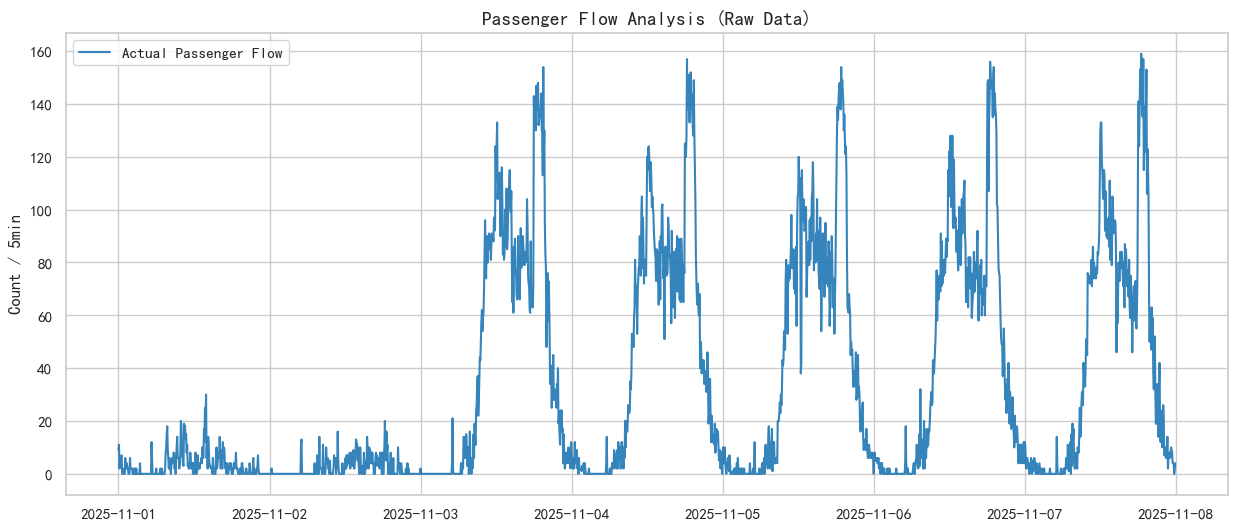

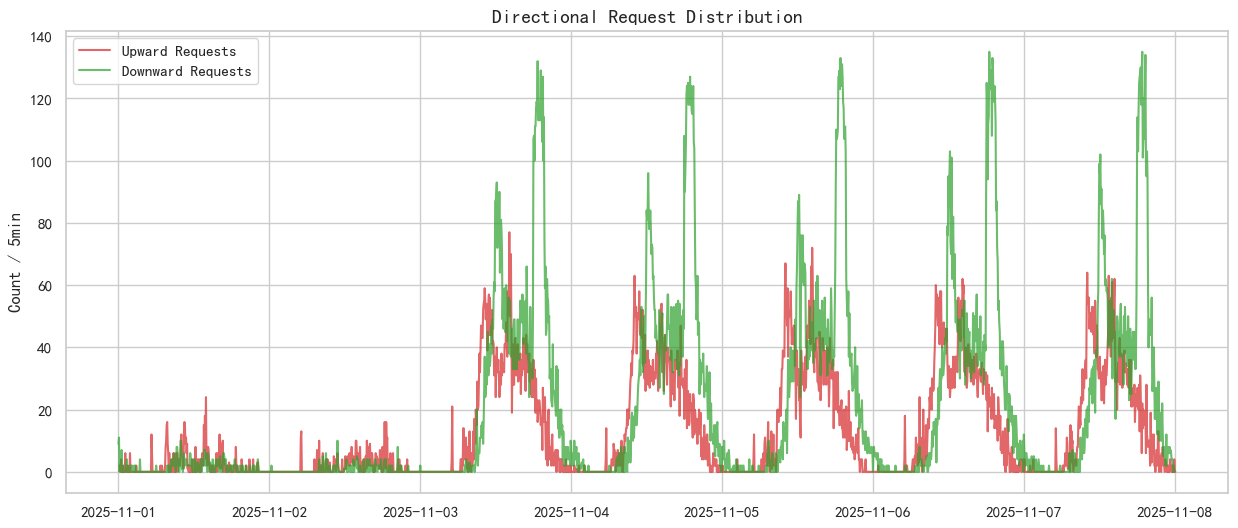

2️⃣ 处理: load_changes.csv


C:\Users\ROG\AppData\Local\Temp\ipykernel_27644\3976971197.py:84: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  load_trend = df_load.set_index('Time').resample('1H')['Load In (kg)'].mean().fillna(0)


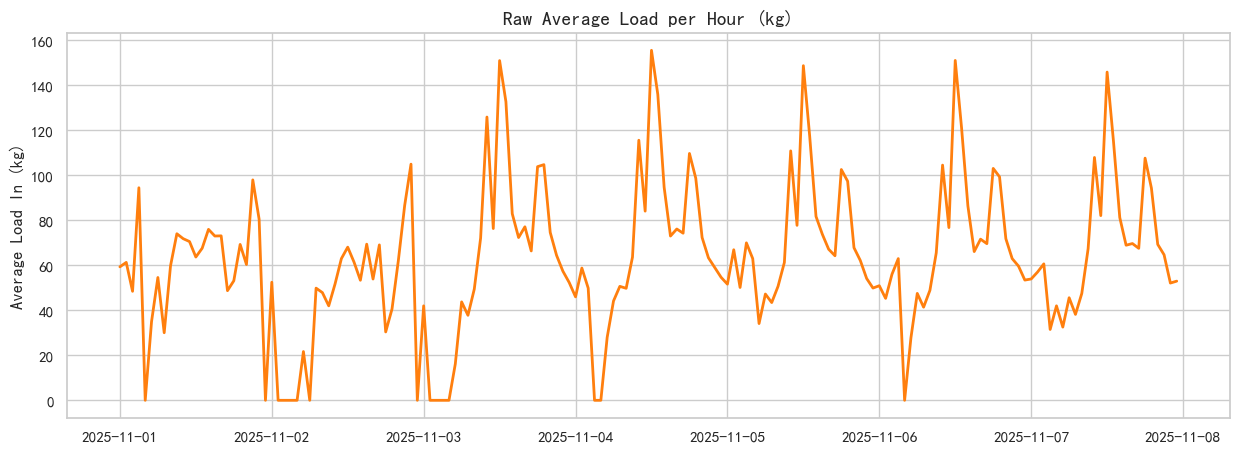

3️⃣ 处理: car_stops.csv


C:\Users\ROG\AppData\Local\Temp\ipykernel_27644\3976971197.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=floor_counts.index, y=floor_counts.values, palette='viridis')


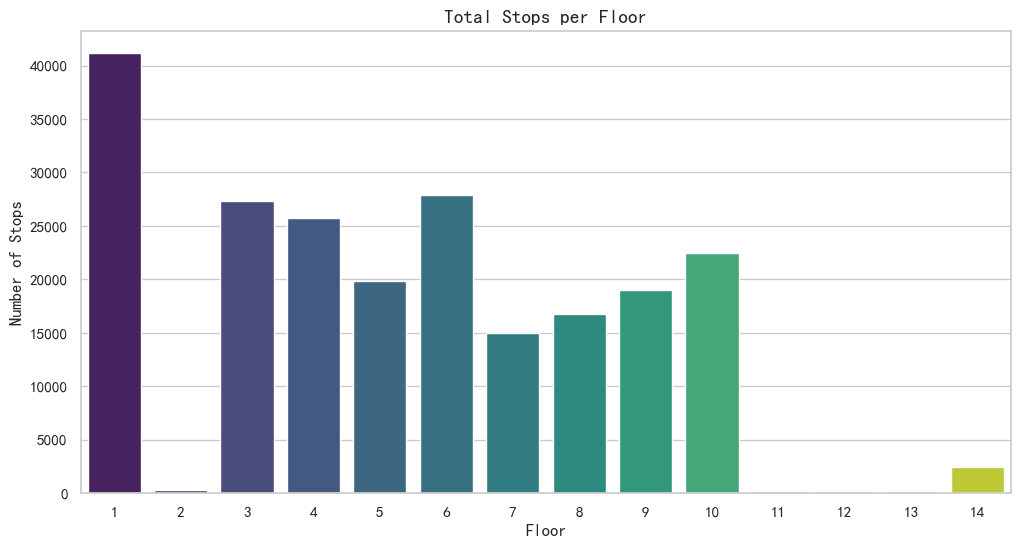

4️⃣ 处理: car_calls.csv


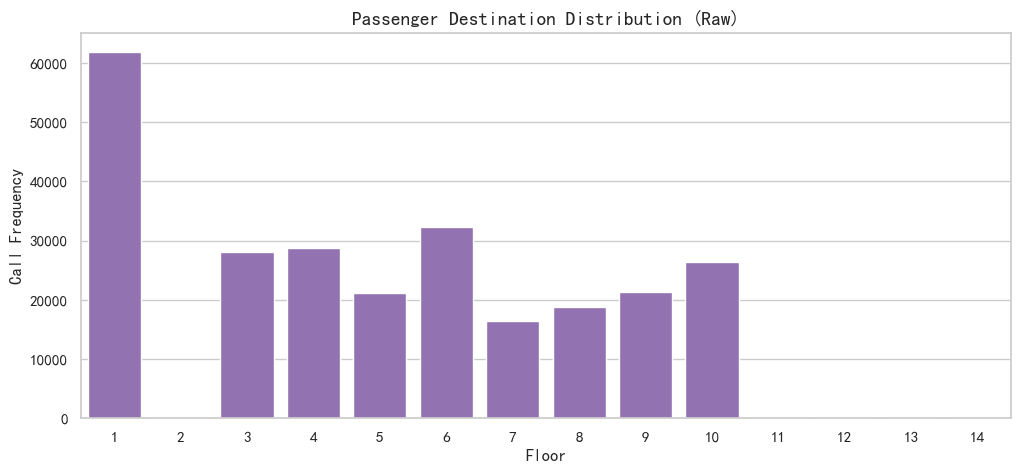

5️⃣ 处理: car_departures.csv


C:\Users\ROG\AppData\Local\Temp\ipykernel_27644\3976971197.py:137: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=workload.index, y=workload.values, palette='magma')


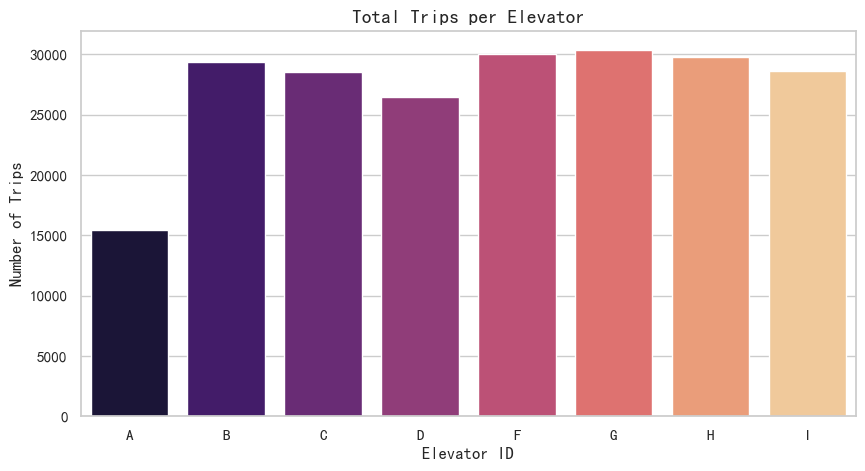

6️⃣ 处理: maintenance_mode.csv


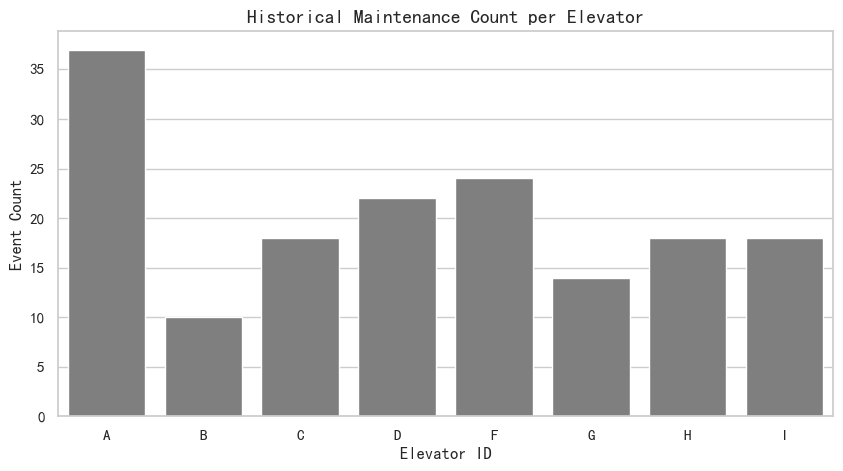


✅ 原始数据分析导出完成！SVG 矢量图已存入: 'Data_Analysis_Results'。


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import shutil

# ==========================================
# 🔧 0. 全局配置
# ==========================================
DATA_FOLDER = 'mcm26Train-B-Data'  # 输入数据文件夹
OUTPUT_FOLDER = 'Data_Analysis_Results'  # 输出矢量图文件夹

sns.set(style="whitegrid")         
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'Arial'] 
plt.rcParams['axes.unicode_minus'] = False

# 文件夹管理逻辑：清空并重建
def initialize_output_folder(folder_path):
    if os.path.exists(folder_path):
        shutil.rmtree(folder_path)
        print(f"🧹 已清空旧分析结果: {folder_path}")
    os.makedirs(folder_path)
    print(f"📂 矢量图输出目录已就绪: {os.path.abspath(folder_path)}\n")

# 万能读取函数
def read_csv_safe(file_path):
    try:
        return pd.read_csv(file_path)
    except UnicodeDecodeError:
        try:
            return pd.read_csv(file_path, encoding='gbk')
        except:
            return pd.read_csv(file_path, encoding='latin1')

initialize_output_folder(OUTPUT_FOLDER)

if not os.path.exists(DATA_FOLDER):
    print(f"❌ 错误：找不到数据源文件夹 '{DATA_FOLDER}'")
else:
    print(f"✅ 锁定数据源: {DATA_FOLDER}，开始导出原始数据分析图...\n")

# ==========================================
# 📈 Part 1: hall_calls.csv 分析 (原始流量)
# ==========================================
file_hall = os.path.join(DATA_FOLDER, 'hall_calls.csv')
if os.path.exists(file_hall):
    print("1️⃣ 处理: hall_calls.csv")
    df_hall = read_csv_safe(file_hall) 
    df_hall['Time'] = pd.to_datetime(df_hall['Time'])
    
    # 仅展示原始流量分布 (每5分钟)
    traffic_data = df_hall.set_index('Time').resample('5min').size().to_frame(name='Passenger_Count').fillna(0)
    
    plt.figure(figsize=(15, 6))
    points = 7 * 24 * 12 # 展示第一周数据
    plt.plot(traffic_data.index[:points], traffic_data['Passenger_Count'][:points], label='Actual Passenger Flow', color='#1f77b4', alpha=0.9)
    plt.title('Passenger Flow Analysis (Raw Data)', fontsize=14)
    plt.ylabel('Count / 5min')
    plt.legend()
    plt.savefig(os.path.join(OUTPUT_FOLDER, 'Analysis_1_Traffic_Flow.svg'), format='svg', bbox_inches='tight')
    plt.show()

    # 上下行原始分布
    up_flow = df_hall[df_hall['Direction'] == 'Up'].set_index('Time').resample('5min').size()
    down_flow = df_hall[df_hall['Direction'] == 'Down'].set_index('Time').resample('5min').size()
    
    plt.figure(figsize=(15, 6))
    plt.plot(up_flow.index[:points], up_flow[:points], color='#d62728', alpha=0.7, label='Upward Requests')
    plt.plot(down_flow.index[:points], down_flow[:points], color='#2ca02c', alpha=0.7, label='Downward Requests')
    plt.title('Directional Request Distribution', fontsize=14)
    plt.ylabel('Count / 5min')
    plt.legend()
    plt.savefig(os.path.join(OUTPUT_FOLDER, 'Analysis_2_Directional_Flow.svg'), format='svg', bbox_inches='tight')
    plt.show()

# ==========================================
# ⚖️ Part 2: load_changes.csv 分析 (原始载重)
# ==========================================
file_load = os.path.join(DATA_FOLDER, 'load_changes.csv')
if os.path.exists(file_load):
    print("2️⃣ 处理: load_changes.csv")
    df_load = read_csv_safe(file_load)
    df_load['Time'] = pd.to_datetime(df_load['Time'])
    load_trend = df_load.set_index('Time').resample('1H')['Load In (kg)'].mean().fillna(0)
    
    plt.figure(figsize=(15, 5))
    plt.plot(load_trend.index[:24*7], load_trend[:24*7], color='#ff7f0e', linewidth=2)
    plt.title('Raw Average Load per Hour (kg)', fontsize=14)
    plt.ylabel('Average Load In (kg)')
    plt.savefig(os.path.join(OUTPUT_FOLDER, 'Analysis_3_Load_History.svg'), format='svg', bbox_inches='tight')
    plt.show()

# ==========================================
# 🏢 Part 3: car_stops.csv 分析 (停靠统计)
# ==========================================
file_stops = os.path.join(DATA_FOLDER, 'car_stops.csv')
if os.path.exists(file_stops):
    print("3️⃣ 处理: car_stops.csv")
    df_stops = read_csv_safe(file_stops)
    floor_counts = df_stops['Floor'].value_counts().sort_index()
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x=floor_counts.index, y=floor_counts.values, palette='viridis')
    plt.title('Total Stops per Floor', fontsize=14)
    plt.ylabel('Number of Stops')
    plt.xlabel('Floor')
    plt.savefig(os.path.join(OUTPUT_FOLDER, 'Analysis_4_Floor_Stops.svg'), format='svg', bbox_inches='tight')
    plt.show()

# ==========================================
# 🎯 Part 4: car_calls.csv 分析 (目的地统计)
# ==========================================
file_cc = os.path.join(DATA_FOLDER, 'car_calls.csv')
if os.path.exists(file_cc):
    print("4️⃣ 处理: car_calls.csv")
    df_cc = read_csv_safe(file_cc)
    dest_counts = df_cc['Floor'].value_counts().sort_index()
    
    plt.figure(figsize=(12, 5))
    sns.barplot(x=dest_counts.index, y=dest_counts.values, color='#9467bd')
    plt.title('Passenger Destination Distribution (Raw)', fontsize=14)
    plt.ylabel('Call Frequency')
    plt.xlabel('Floor')
    plt.savefig(os.path.join(OUTPUT_FOLDER, 'Analysis_5_Destinations.svg'), format='svg', bbox_inches='tight')
    plt.show()

# ==========================================
# ⚙️ Part 5: car_departures.csv 分析 (工作量统计)
# ==========================================
file_dep = os.path.join(DATA_FOLDER, 'car_departures.csv')
if os.path.exists(file_dep):
    print("5️⃣ 处理: car_departures.csv")
    df_dep = read_csv_safe(file_dep)
    workload = df_dep['Elevator ID'].value_counts().sort_index()
    
    plt.figure(figsize=(10, 5))
    sns.barplot(x=workload.index, y=workload.values, palette='magma')
    plt.title('Total Trips per Elevator', fontsize=14)
    plt.xlabel('Elevator ID')
    plt.ylabel('Number of Trips')
    plt.savefig(os.path.join(OUTPUT_FOLDER, 'Analysis_6_Elevator_Trips.svg'), format='svg', bbox_inches='tight')
    plt.show()

# ==========================================
# 🔧 Part 6: maintenance_mode.csv 分析 (历史记录)
# ==========================================
file_maint = os.path.join(DATA_FOLDER, 'maintenance_mode.csv')
if os.path.exists(file_maint):
    print("6️⃣ 处理: maintenance_mode.csv")
    df_maint = read_csv_safe(file_maint)
    maint_counts = df_maint['Elevator ID'].value_counts().sort_index()
    
    if len(maint_counts) > 0:
        plt.figure(figsize=(10, 5))
        sns.barplot(x=maint_counts.index, y=maint_counts.values, color='#7f7f7f')
        plt.title('Historical Maintenance Count per Elevator', fontsize=14)
        plt.xlabel('Elevator ID')
        plt.ylabel('Event Count')
        plt.savefig(os.path.join(OUTPUT_FOLDER, 'Analysis_7_Maintenance_History.svg'), format='svg', bbox_inches='tight')
        plt.show()
    else:
        print("   -> 无维修历史记录")

print(f"\n✅ 原始数据分析导出完成！SVG 矢量图已存入: '{OUTPUT_FOLDER}'。")